In [ ]:
# pip install ipympl

In [8]:
import pandas as pd
df = pd.read_csv('df_test.csv') 
df.head()


,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...


In [26]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output

# --- Tải dữ liệu THẬT của bạn ---
try:
    df_real = pd.read_csv('df_test.csv')
    print(f"Đã tải thành công 'df_test.csv'. Tổng số {len(df_real)} bản ghi.")
except FileNotFoundError:
    print("LỖI: Không tìm thấy file 'df_test.csv'. Hãy đảm bảo file ở đúng vị trí.")
    # Dừng cell nếu lỗi
    raise

# --- Chuẩn bị dữ liệu cho mô phỏng ---

# 1. Lấy một mẫu 200 bản ghi để mô phỏng (giống code cũ)
# BỎ .sample(200) NẾU BẠN MUỐN CHẠY TRÊN TOÀN BỘ DỮ LIỆU (sẽ rất chậm)
df_full = df_real.sample(200, random_state=42).copy()

# 2. Thêm cột sentiment_numeric (dùng cho Biểu đồ 4)
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df_full['sentiment_numeric'] = df_full['airline_sentiment'].map(sentiment_map)

# 3. Tạo cột 'timestamp' GIẢ LẬP
# Chúng ta giả lập các tweet đến cách nhau 15 phút
num_records_in_sample = len(df_full)
df_full['timestamp'] = pd.to_datetime(pd.date_range(start='2025-01-01', periods=num_records_in_sample, freq='15min'))

# 4. Reset index
# Quan trọng: Đảm bảo vòng lặp for .iloc[i] chạy đúng thứ tự
df_full = df_full.reset_index(drop=True)

print(f"Đã chuẩn bị {len(df_full)} bản ghi từ 'df_test.csv' để mô phỏng. Sẵn sàng chạy.")
print("LƯU Ý: Mỗi cell sau sẽ chạy một mô phỏng. Hãy để nó chạy xong hoặc tự ngắt (Interrupt Kernel) nếu muốn.")

# In 5 dòng đầu của dữ liệu sẽ được mô phỏng
display(df_full.head())

Đã tải thành công 'df_test.csv'. Tổng số 14640 bản ghi.
Đã chuẩn bị 200 bản ghi từ 'df_test.csv' để mô phỏng. Sẵn sàng chạy.
LƯU Ý: Mỗi cell sau sẽ chạy một mô phỏng. Hãy để nó chạy xong hoặc tự ngắt (Interrupt Kernel) nếu muốn.


,airline_sentiment,negativereason,airline,text,sentiment_numeric,timestamp
0,positive,NaN,Southwest,@SouthwestAir you're my early frontrunner for ...,1,2025-01-01 00:00:00
1,negative,Cancelled Flight,US Airways,@USAirways how is it that my flt to EWR was Ca...,-1,2025-01-01 00:15:00
2,negative,Late Flight,Delta,@JetBlue what is going on with your BDL to DCA...,-1,2025-01-01 00:30:00
3,neutral,NaN,Delta,@JetBlue do they have to depart from Washingto...,0,2025-01-01 00:45:00
4,negative,Customer Service Issue,Delta,@JetBlue I can probably find some of them. Are...,-1,2025-01-01 01:00:00


c:\Users\LINH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\LINH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



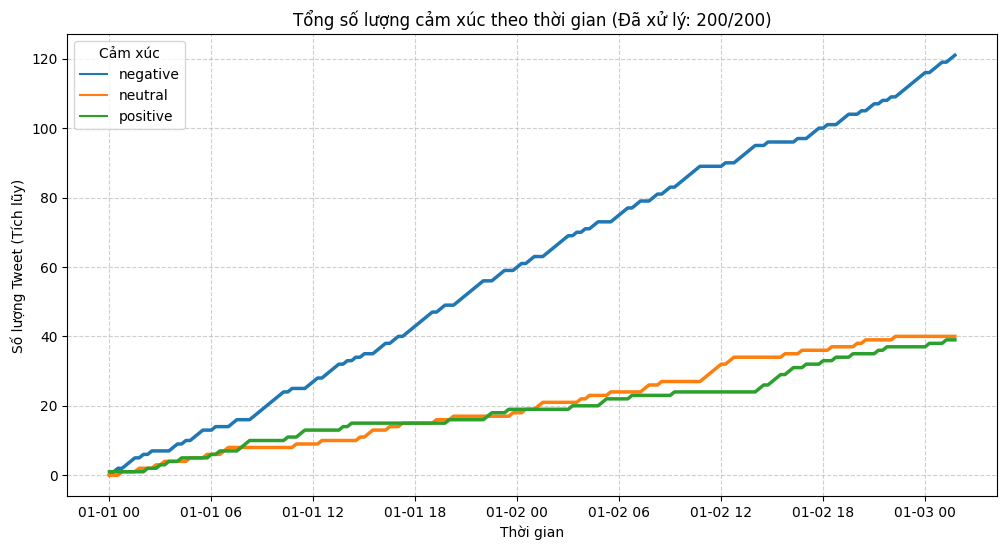

--- Mô phỏng 1 hoàn tất ---


In [27]:
print("--- Bắt đầu Mô phỏng: Biểu đồ 1 - Đếm số lượng cảm xúc ---")

# Khởi tạo các biến để lưu trữ dữ liệu tích lũy
sentiment_counts_cumulative = {'negative': 0, 'neutral': 0, 'positive': 0}
history_sentiment_counts = [] # Lưu lịch sử để vẽ

try:
    for i in range(len(df_full)):
        current_record = df_full.iloc[i]
        current_timestamp = current_record['timestamp']
        current_sentiment = current_record['airline_sentiment']

        # Cập nhật số lượng
        if pd.notna(current_sentiment):
            sentiment_counts_cumulative[current_sentiment] += 1
        
        # Thêm vào lịch sử để vẽ
        history_entry = sentiment_counts_cumulative.copy()
        history_entry['timestamp'] = current_timestamp
        history_sentiment_counts.append(history_entry)
        
        # Cập nhật biểu đồ (mỗi 5 bản ghi để giảm lag)
        if (i + 1) % 5 == 0 or (i + 1) == len(df_full):
            clear_output(wait=True) # Xóa output trước đó
            plt.figure(figsize=(12, 6))
            
            # Chuyển lịch sử thành DataFrame để vẽ
            df_history = pd.DataFrame(history_sentiment_counts).set_index('timestamp')
            
            sns.lineplot(data=df_history, dashes=False, linewidth=2.5)
            plt.title(f'Tổng số lượng cảm xúc theo thời gian (Đã xử lý: {i+1}/{len(df_full)})')
            plt.xlabel('Thời gian')
            plt.ylabel('Số lượng Tweet (Tích lũy)')
            plt.legend(title='Cảm xúc')
            plt.grid(True, linestyle='--', alpha=0.6)
            
            display(plt.gcf())
            plt.close()
            
            # Đặt time.sleep(1.0) cho yêu cầu của bạn
            # Tôi đặt 0.01 để demo chạy nhanh
            time.sleep(0.01) 

except KeyboardInterrupt:
    print("Mô phỏng đã dừng.")

print(f"--- Mô phỏng 1 hoàn tất ---")

In [ ]:
# pip install plotly (terminal)

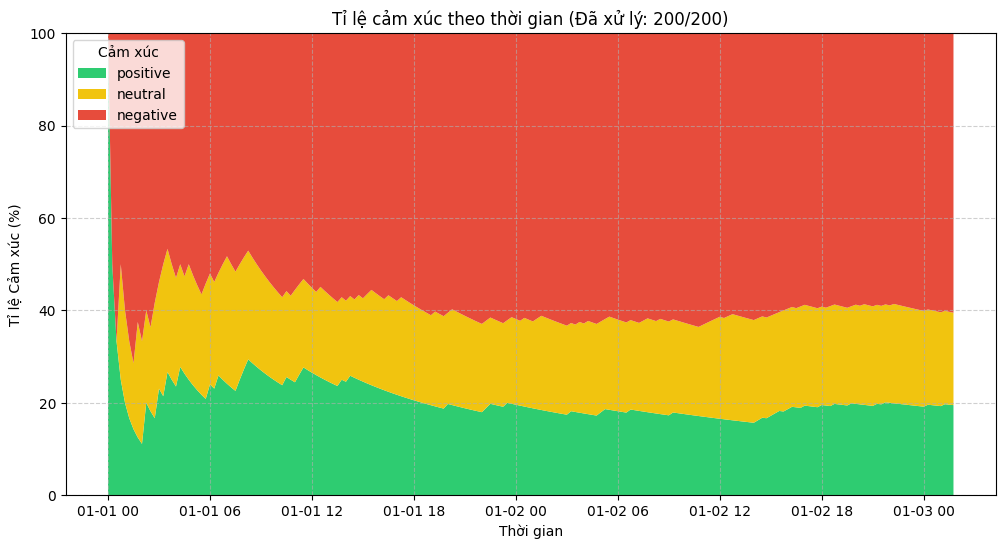

--- Mô phỏng 2 hoàn tất ---


In [28]:
print("--- Bắt đầu Mô phỏng: Biểu đồ 2 - Tỉ lệ cảm xúc ---")

# Khởi tạo các biến
sentiment_counts_cumulative = {'negative': 0, 'neutral': 0, 'positive': 0}
history_sentiment_props = [] # Lưu lịch sử tỉ lệ
labels = ['positive', 'neutral', 'negative'] # Thứ tự vẽ

try:
    for i in range(len(df_full)):
        current_record = df_full.iloc[i]
        current_timestamp = current_record['timestamp']
        current_sentiment = current_record['airline_sentiment']

        if pd.notna(current_sentiment):
            sentiment_counts_cumulative[current_sentiment] += 1
        
        total_counts = sum(sentiment_counts_cumulative.values())
        
        if total_counts > 0:
            # Tính tỉ lệ
            props = {label: (sentiment_counts_cumulative[label] / total_counts) * 100 for label in labels}
            props['timestamp'] = current_timestamp
            history_sentiment_props.append(props)

        # Cập nhật biểu đồ (mỗi 5 bản ghi)
        if (i + 1) % 5 == 0 or (i + 1) == len(df_full):
            clear_output(wait=True)
            plt.figure(figsize=(12, 6))
            
            if not history_sentiment_props:
                continue

            df_history = pd.DataFrame(history_sentiment_props).set_index('timestamp')
            
            # Chuẩn bị dữ liệu cho stackplot
            x = df_history.index
            y = [df_history[label] for label in labels] # Lấy [pos_data, neu_data, neg_data]
            
            plt.stackplot(x, y, labels=labels, colors=sns.color_palette(['#2ecc71', '#f1c40f', '#e74c3c']))
            plt.title(f'Tỉ lệ cảm xúc theo thời gian (Đã xử lý: {i+1}/{len(df_full)})')
            plt.xlabel('Thời gian')
            plt.ylabel('Tỉ lệ Cảm xúc (%)')
            plt.legend(title='Cảm xúc', loc='upper left')
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.ylim(0, 100) # Luôn là 100%
            
            display(plt.gcf())
            plt.close()
            time.sleep(0.01) # Đặt 1.0 cho yêu cầu của bạn

except KeyboardInterrupt:
    print("Mô phỏng đã dừng.")

print(f"--- Mô phỏng 2 hoàn tất ---")

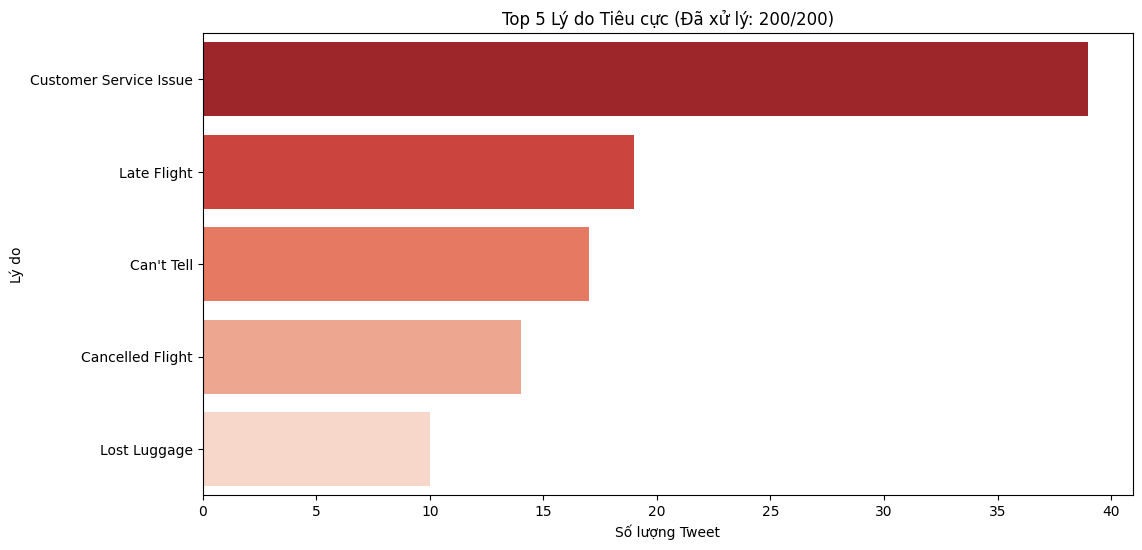

--- Mô phỏng 3 hoàn tất ---


In [29]:
print("--- Bắt đầu Mô phỏng: Biểu đồ 3 - Top Lý do Tiêu cực ---")

# Khởi tạo
reason_counts = {} # Dùng dict để đếm

try:
    for i in range(len(df_full)):
        current_record = df_full.iloc[i]
        
        # Chỉ xử lý nếu là negative và có lý do
        if current_record['airline_sentiment'] == 'negative' and pd.notna(current_record['negativereason']):
            reason = current_record['negativereason']
            reason_counts[reason] = reason_counts.get(reason, 0) + 1 # Cập nhật dict
        
        # Cập nhật biểu đồ (mỗi 5 bản ghi)
        if (i + 1) % 5 == 0 or (i + 1) == len(df_full):
            clear_output(wait=True)
            plt.figure(figsize=(12, 6))
            
            if not reason_counts:
                plt.title(f'Top Lý do Tiêu cực (Chưa có dữ liệu - Đã xử lý: {i+1}/{len(df_full)})')
            else:
                # Chuyển dict thành Series để sort và lấy top 5
                top_reasons = pd.Series(reason_counts).nlargest(5)
                
                sns.barplot(x=top_reasons.values, y=top_reasons.index, palette='Reds_r')
                plt.title(f'Top 5 Lý do Tiêu cực (Đã xử lý: {i+1}/{len(df_full)})')
                plt.xlabel('Số lượng Tweet')
                plt.ylabel('Lý do')
            
            display(plt.gcf())
            plt.close()
            time.sleep(0.01) # Đặt 1.0 cho yêu cầu của bạn

except KeyboardInterrupt:
    print("Mô phỏng đã dừng.")

print(f"--- Mô phỏng 3 hoàn tất ---")

c:\Users\LINH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\LINH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\LINH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\LINH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a futur

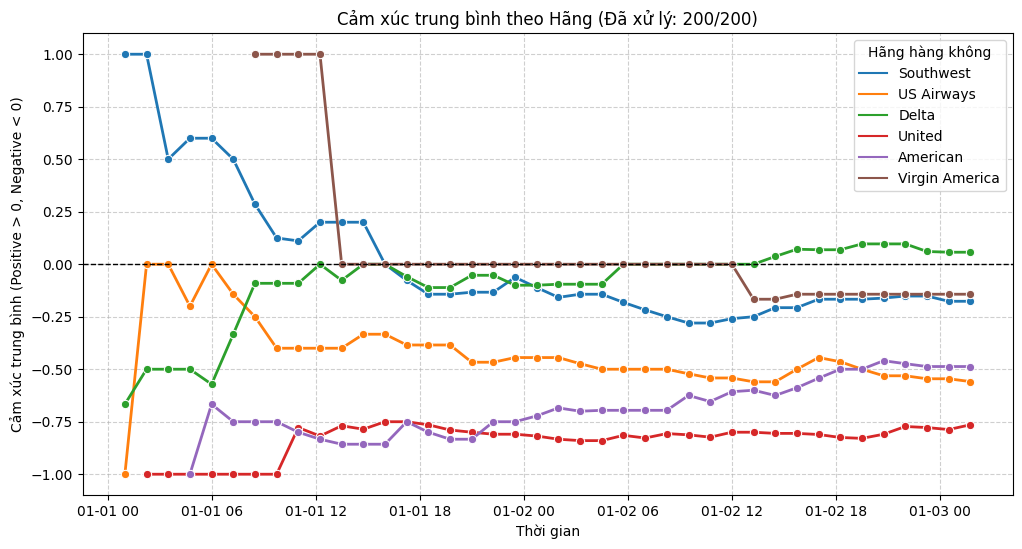

--- Mô phỏng 4 hoàn tất ---


In [30]:
print("--- Bắt đầu Mô phỏng: Biểu đồ 4 - Cảm xúc trung bình theo Hãng ---")

# Khởi tạo
airline_sentiment_sum = {}
airline_sentiment_count = {}
history_avg_sentiment = [] # Lưu lịch sử

try:
    for i in range(len(df_full)):
        current_record = df_full.iloc[i]
        airline = current_record['airline']
        sentiment_num = current_record['sentiment_numeric']
        
        if pd.notna(sentiment_num):
            # Khởi tạo nếu chưa thấy hãng bay
            airline_sentiment_sum.setdefault(airline, 0)
            airline_sentiment_count.setdefault(airline, 0)
            
            # Cập nhật
            airline_sentiment_sum[airline] += sentiment_num
            airline_sentiment_count[airline] += 1
        
        # Ghi lại lịch sử (sau mỗi 5 bản ghi)
        if (i + 1) % 5 == 0 or (i + 1) == len(df_full):
            # Tính toán điểm trung bình hiện tại cho TẤT CẢ hãng bay
            for airline_name in airline_sentiment_count.keys():
                avg_score = airline_sentiment_sum[airline_name] / airline_sentiment_count[airline_name]
                history_avg_sentiment.append({
                    'timestamp': current_record['timestamp'],
                    'airline': airline_name,
                    'avg_sentiment': avg_score
                })

            clear_output(wait=True)
            plt.figure(figsize=(12, 6))
            
            if not history_avg_sentiment:
                continue
                
            df_history = pd.DataFrame(history_avg_sentiment)
            
            sns.lineplot(data=df_history, x='timestamp', y='avg_sentiment', hue='airline', marker='o', linewidth=2)
            plt.title(f'Cảm xúc trung bình theo Hãng (Đã xử lý: {i+1}/{len(df_full)})')
            plt.xlabel('Thời gian')
            plt.ylabel('Cảm xúc trung bình (Positive > 0, Negative < 0)')
            plt.legend(title='Hãng hàng không')
            plt.axhline(0, color='black', linestyle='--', linewidth=1) # Đường 0 (Neutral)
            plt.grid(True, linestyle='--', alpha=0.6)
            
            display(plt.gcf())
            plt.close()
            time.sleep(0.01) # Đặt 1.0 cho yêu cầu của bạn

except KeyboardInterrupt:
    print("Mô phỏng đã dừng.")

print(f"--- Mô phỏng 4 hoàn tất ---")